



## 💼Portfolio: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda bizning vazifamiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

## Bizda uylarning joylashgan hududi, o`lchamlari, xonalar soni, qavati hamda narxi berilgan. Biz shu parametrlardan foydalanib uy narxlarini bashorat qilishimiz kerak!


### Analitik yondashuvni aniqlaymiz.
#### 1.2 Analitik yondoshuvni aniqlash
Bu bosqichda biz bir nechta narsalarni aniqlashtirib olamiz: 
- Model: Supervised, Unsupervised, Reinforcement?
- Algoritm: klassifikasiya, regressiya, yoki boshqa turda
- Usul: Online yoki offline

Yuqoridagi savollarga javob beramiz:
1. Supervised learning - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdadi median narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
2. Regressiya - "Bashorat" (prognoz) dedikmi demak bu regressia algoritmlari yordamida hal qilinadi
3. Offline - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q.

Model aniqligini qanday baholaymiz?

Aniqlikni baholashning turli usullari bor, regressiya algoritmlar uchun odatda **o'rtacha kvadrat xatolik** (Root Mean Square Error - RMSE) ko'p ishlatiladi:

![RMSE](https://i.imgur.com/aXL9iWa.png)

Bu yerda:
- $m$ - datasetdagi qatorlar soni (har bir qator bitta ma'lumot)
- $x^{(i)}$ - $i$-qator uchun barcha parametrlar vektori (_label_ dan tashqari)
- $y^{(i)}$ - $i$-qator uchun label (bizdagi misolda median uy narxi)
- $X$ - labeldan boshqa barcha parametrlar
- $h$ - sizning modelingizdan qaytgan bashorat (hypothesis). 
    - $h(x^{(i)})$ - $i$-qator uchun model qaytargan bashorat.
    
Aniqlikni baholashning yana bir usuli, o'rtacha absolyut xatolik (mean absolute error - MAE).

![MAE](https://i.imgur.com/GJH9CGy.png)

RMSE ham MAE ham ikki vektor, bashorat va label o'rtasidagi farqni hisoblaydi. Xato qancha kam bo'lsa, natija shuncha yaxshi hisoblanadi.



## 💠Kerakli kutubxonalar:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

datasetni chaqirib olamiz:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BehruzDS/DS-praktikum-datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


### 2.1 Ma'lumotlarni ko'ramiz 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


### `NaN` qiymatlar yo'q. ammo bazi ustunlar object(matn) ko'rinishida. Machine Learning faqat raqamli ustunlar bilan ishlagani uchun biz keyingi o`rinlarda raqamli ustunlarni matnli ustunga o'takazib olamiz.


`size` va `price` ustunlarini malumot turini sonli korinishga olib kelamiz yani int(float) turga o`tkazamiz

In [4]:
df['size'].astype(dtype='float')

ValueError: ignored

## Bu ustunda `Площадьземли:1сот` qiymati ham bor ekan . Buni  1sotix (100 m^2) ga o`zgartiramiz.

In [5]:
df['size'][df['size']== 'Площадьземли:1сот']=100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df['size'] = df['size'].astype(dtype='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 413.8+ KB


## `price` ustuni o'zgartiramiz.

In [8]:
df['price'] = df['price'].astype(dtype = 'int')

ValueError: ignored

In [9]:
df[df['price']=='Договорная']

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,Договорная


### Bunday qiymatli qatorlarni tashlab yuboramiz. chunki ularni taxminiy qiymatlar bilan to'ldirib bolmaydi.

In [10]:
# df[df['price']=='Договорная'].index
df.drop(index = df[df['price']=='Договорная'].index, inplace=True)

# yoki
# df = df[df['price']!='Договорная']

In [11]:
df['price'] = df['price'].astype(dtype ='int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7466 non-null   object 
 1   district    7466 non-null   object 
 2   rooms       7466 non-null   int64  
 3   size        7466 non-null   float64
 4   level       7466 non-null   int64  
 5   max_levels  7466 non-null   int64  
 6   price       7466 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 466.6+ KB


Malumotlarni tahlil qilishda davom etamiz

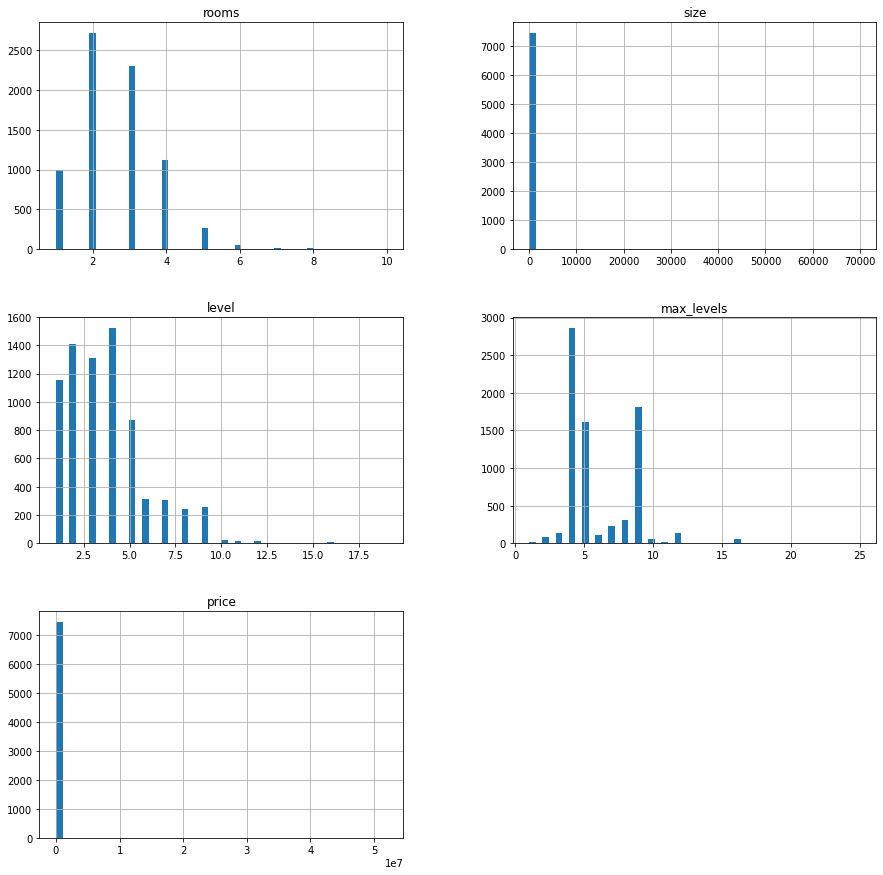

In [19]:
%matplotlib inline
df.hist(bins=50, figsize=(15,15))
plt.show()

### Grafikdan ma'lumki bizda g'ayritabiiy qiymatlar mavjud. `size` hamda `price` ustunida ko`rishimiz mumkin. qiymatlar bitta ustunga yig'ilib qolgan.

In [20]:
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.535205,3.693678,6.023841,7.133421e+04
std,1.083200,1501.057455,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


### Ko'rinib Turibdiki, size ustunida maydoni `70000 kv` gacha bo'lgan uylar ham borekan.price ustunida esa `52 mln $` gacha uylar. Ular g`ayritabiiy qiymatlar sifatida tashlab yuboriladi.

Ma`lumotlarni tozalaymiz:

In [51]:
df = df[(df['size'] < 250) & (df['size'] > 15)]

In [52]:
df = df[(df['price']<400000) & (df['price']>10000)]

In [53]:
df = df[df['rooms']<7]

In [63]:
df = df[df['level']<13]

### Takroriy qiymatlarni o`chiramiz:

In [81]:
df.drop_duplicates(inplace=True)

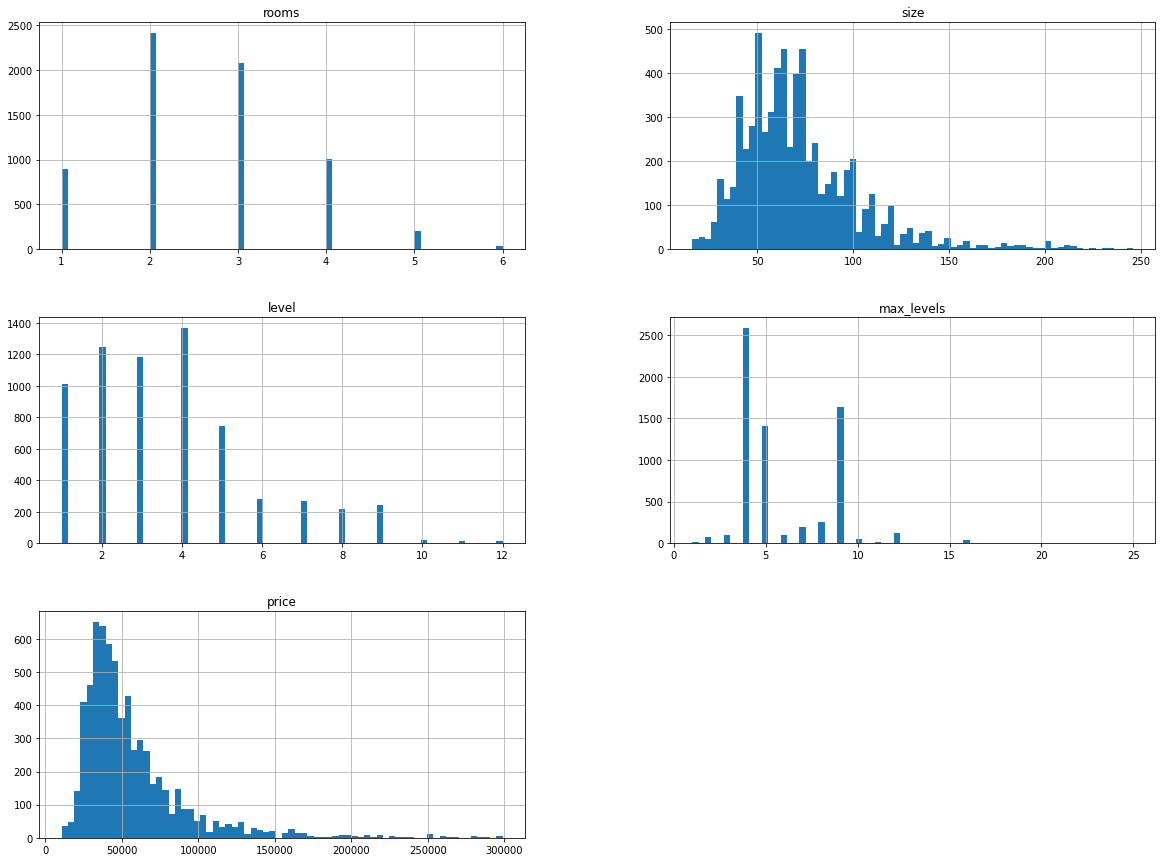

In [83]:
%matplotlib inline
df.hist(bins = 70, figsize=(20,15))
plt.show()

`price` ustunida aksariyat qiymatlar `300000$` dan kichik, undan kattalari esa kopmas va ular model ishlashi uchun yomon tasir o`tkazadi.

In [56]:
df = df[df['price']<300000] # tashlab yuboramiz:

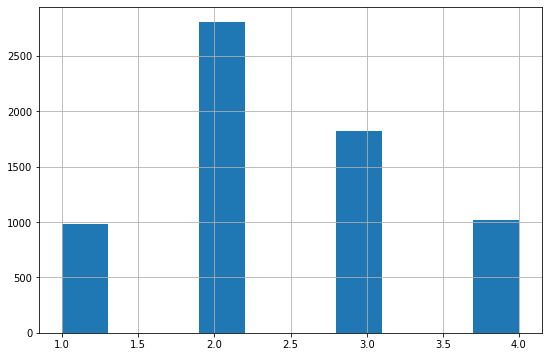

In [84]:
df['price_cat'] = pd.cut(df['price'], bins=[0., 30000.0, 50000.0, 80000.0, 300000.0, np.inf], labels=[1,2,3,4,5])
df['price_cat'].hist(figsize=(9,6))
plt.show()

In [66]:
df.head()

,location,district,rooms,size,level,max_levels,price,price_cat
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,3
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,3
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,2
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,2
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,3


In [85]:
df.to_csv('Tashkent_inc-prep.csv',index=False)

In [86]:
df = pd.read_csv('Tashkent_inc-prep.csv')
df.head()

,location,district,rooms,size,level,max_levels,price,price_cat
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,3
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,3
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,2
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,2
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,3


## Malumotlarni train va test setga ajratamiz:

## Muvozanatli train va test set

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df,df['price_cat']):
      strat_train_set = df.loc[train_index]
      strat_test_set = df.loc[test_index]

## Muvozanatsiz test va train set

In [89]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Bizga muvozanatlisini olamiz

`price_cat` ustuni endi kerak emas, train va test setlardan o'chirib tashlaymiz.

In [90]:
strat_train_set.drop('price_cat', axis=1, inplace=True)
strat_test_set.drop('price_cat', axis=1, inplace=True)

### 2.3 Ma'lumotlarni tahlil qilamiz.

Keling endi bevosita ma'lumotlarni tahlil qilishga o'taylik. Esingizda bo'lsa biz endi `train` set bilan ishlashimiz kerak. Bizda hozircha 2 ta alohida train set bo'lib qoldi:
- `train_set` - `train_test_split` yordamida bo'lingan (muvozanatsiz)
- `strat_train_set` - `StratifiedShuffleSplit` yordamida bo'lingan.

Biz ikkinchi setdan foydalanamiz. Qulaylik uchun bu setimizda nusxa ko'chirib olamiz.

In [ ]:
strat_train_set.head()

,district,rooms,size,level,max_levels,price
3797,Чиланзарский,2,40.0,4,4,30000
6025,Шайхантахурский,5,97.0,4,5,58000
1120,Яшнободский,5,110.0,3,5,58000
6464,Мирабадский,2,70.0,4,9,55000
6215,Чиланзарский,2,62.0,2,4,40000


In [91]:
housing = strat_train_set.copy()

In [93]:
housing

,location,district,rooms,size,level,max_levels,price
5273,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,60.00,5,9,47000
4576,"город Ташкент, Яшнободский район, Фергана Йули",Яшнободский,3,72.00,5,9,36500
5158,"город Ташкент, Мирабадский район, 2-й проезд К...",Мирабадский,3,75.00,6,9,57500
6416,"город Ташкент, Шайхантахурский район, Дружба Н...",Шайхантахурский,4,100.26,9,9,65000
5764,"город Ташкент, Яшнободский район, Паркент",Яшнободский,2,52.50,3,9,42423
...,...,...,...,...,...,...,...
4606,"город Ташкент, Мирзо-Улугбекский район, Дархон",Мирзо-Улугбекский,2,65.00,3,9,57000
1799,"город Ташкент, Мирабадский район, Нукус",Мирабадский,4,120.00,1,4,135000
2191,"город Ташкент, Мирзо-Улугбекский район, Феруза-1",Мирзо-Улугбекский,1,33.00,4,4,23000
4111,"город Ташкент, Учтепинский район, Чиланзар ква...",Учтепинский,2,54.00,3,4,37500


In [98]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
loc_prep = ordinal_encoder.fit_transform(housing[['location']])
dist_prep = ordinal_encoder.fit_transform(housing[['district']])

In [103]:
housing['location'] = loc_prep
housing['district'] = dist_prep

In [107]:
housing.head()

,location,district,rooms,size,level,max_levels,price
5273,1079.0,9.0,2,60.00,5,9,47000
4576,1320.0,11.0,3,72.00,5,9,36500
5158,11.0,1.0,3,75.00,6,9,57500
6416,850.0,7.0,4,100.26,9,9,65000
5764,1294.0,11.0,2,52.50,3,9,42423


### Korrelyasiya
Bizning asl maqsadimiz bizga berilgan ma'lumotlar orasida uyning narxiga ta'sir qiluvchi parametrlarni topish. Bunda esa bizga aynan korrelyasiya juda qo'l keladi.



In [109]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
size          0.796596
rooms         0.577010
max_levels    0.243505
level         0.082082
location     -0.095832
district     -0.096470
dtype: float64

# Vizual ko`rinishda👇

In [181]:
corr_matrix = housing.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,location,district,rooms,size,level,max_levels,price
location,1.000000,0.989575,0.050826,0.075209,0.034112,0.018112,0.095832
district,0.989575,1.000000,0.049205,0.076235,0.026288,0.010171,0.096470
rooms,0.050826,0.049205,1.000000,0.806390,0.146406,0.182527,0.577010
size,0.075209,0.076235,0.806390,1.000000,0.197711,0.310967,0.796596
level,0.034112,0.026288,0.146406,0.197711,1.000000,0.566083,0.082082
max_levels,0.018112,0.010171,0.182527,0.310967,0.566083,1.000000,0.243505
price,0.095832,0.096470,0.577010,0.796596,0.082082,0.243505,1.000000


Ko'rishimiz mumkinki, `price` va `size`, `rooms`, `max_levels` ustunlari orasida korrelyatsiya nisbatan kuchli.
qolgan ustunlar esa ahamiyatsiz ekan. Shu sabab ularni tashlab yuboramiz

`seabron` tarkibidagi `pairplot` funksiyasi yordamida korrelyasiya qiymatlarini grafik ko'rinishida chiqarishimiz ham mumkin.

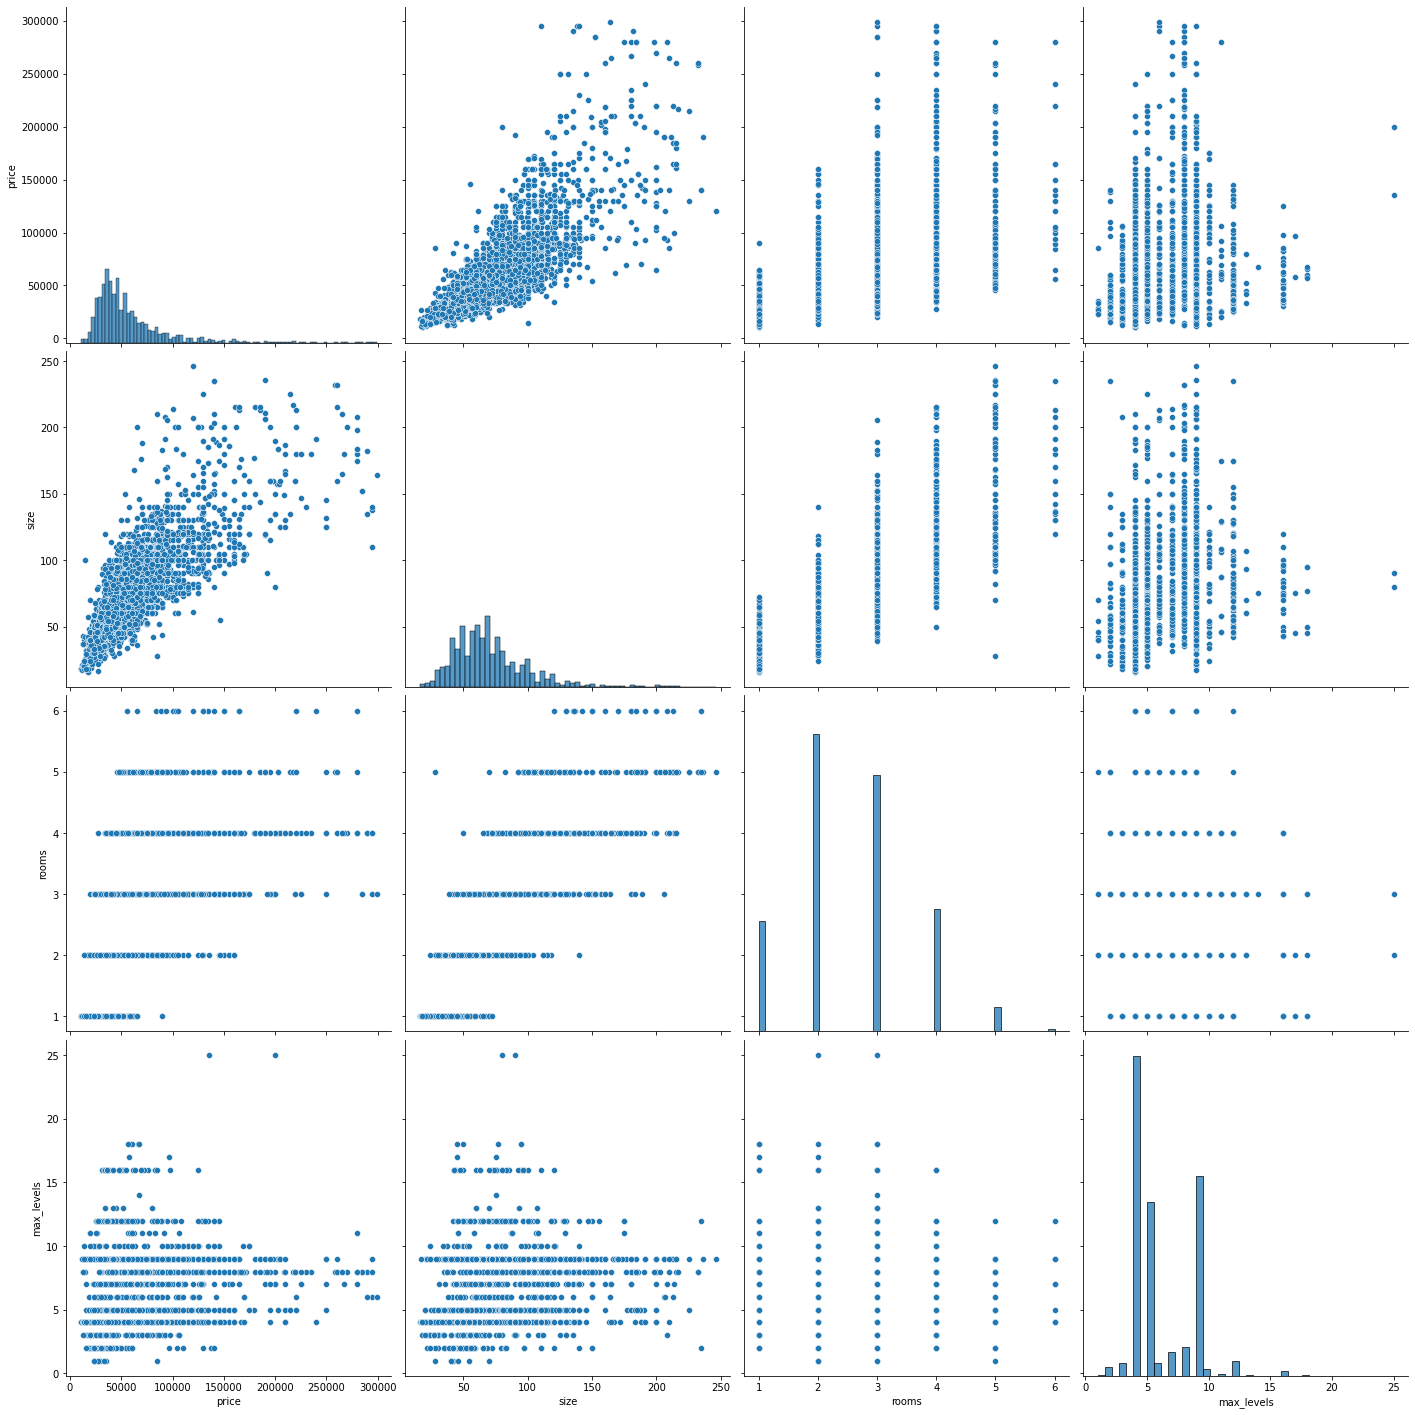

In [110]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(housing[cols], height=5)
plt.show()

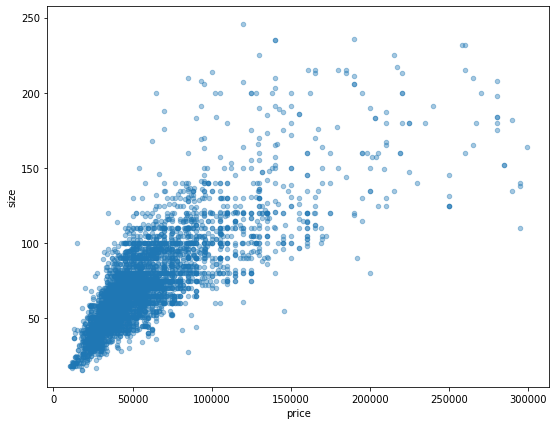

In [111]:
housing.plot(kind='scatter', x="price", y="size", alpha=0.4, figsize=(9,7),)
plt.show()

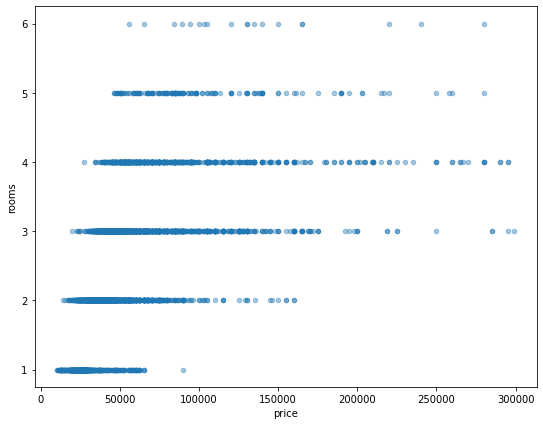

In [112]:
housing.plot(kind='scatter', x="price", y="rooms", alpha=0.4, figsize=(9,7))
plt.show()

# Ma`lumotlarni ML uchun tayyorlaymiz

In [123]:
# Trainset
X_train = strat_train_set.drop("price", axis=1)
X_train_labels = strat_train_set[["price"]].copy()

# Testset
X_test = strat_test_set.drop('price', axis=1)
X_test_labels = strat_test_set[['price']].copy()

In [124]:
X_train.drop('location', axis=1, inplace=True)
X_test.drop('location', axis=1, inplace=True)

raqamli ustunlar:

In [126]:
X_train_num = X_train.drop('district', axis=1)
X_train_num

,rooms,size,level,max_levels
5273,2,60.00,5,9
4576,3,72.00,5,9
5158,3,75.00,6,9
6416,4,100.26,9,9
5764,2,52.50,3,9
...,...,...,...,...
4606,2,65.00,3,9
1799,4,120.00,1,4
2191,1,33.00,4,4
4111,2,54.00,3,4


In [128]:
X_train_cat = X_train[['district']]
X_train_cat

,district
5273,Яккасарайский
4576,Яшнободский
5158,Мирабадский
6416,Шайхантахурский
5764,Яшнободский
...,...
4606,Мирзо-Улугбекский
1799,Мирабадский
2191,Мирзо-Улугбекский
4111,Учтепинский


ML algoritmlar sonlar bilan ishlaydi. Shuning uchun bu ustunni ham sonlarga 
o'zgartirishimiz kerak. 

Buning uchun sklearn tarkibida `OrdinalEncoder`dan foydalanamiz:

In [129]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
X_train_cat_encoded[:10]

array([[ 9.],
       [11.],
       [ 1.],
       [ 7.],
       [11.],
       [ 2.],
       [ 5.],
       [ 2.],
       [11.],
       [11.]])

In [130]:
ordinal_encoder.categories_

[array(['Бектемирский', 'Мирабадский', 'Мирзо-Улугбекский', 'Олмазорский',
        'Сергелийский', 'Учтепинский', 'Чиланзарский', 'Шайхантахурский',
        'Юнусабадский', 'Яккасарайский', 'Янгихаётский', 'Яшнободский'],
       dtype=object)]

In [131]:
X_train.head()

,district,rooms,size,level,max_levels
5273,Яккасарайский,2,60.00,5,9
4576,Яшнободский,3,72.00,5,9
5158,Мирабадский,3,75.00,6,9
6416,Шайхантахурский,4,100.26,9,9
5764,Яшнободский,2,52.50,3,9


In [132]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(X_train_num)

array([[-0.57355106, -0.36227147,  0.61669148,  1.19296113],
       [ 0.40975883,  0.03549406,  0.61669148,  1.19296113],
       [ 0.40975883,  0.13493545,  1.08078597,  1.19296113],
       ...,
       [-1.55686095, -1.25724393,  0.152597  , -0.78758599],
       [-0.57355106, -0.56115424, -0.31149749, -0.78758599],
       [-0.57355106, -0.76003701, -0.77559197, -0.39147656]])

## Pipline

Mavzu boshida biz jarayonlarni avtomatlashtirish haqida gapirdik. Buning uchun scikit-learn da maxsus **pipeline** tushunchasi bor. Pipeline ingliz tilidan gaz (neft) quvuri deb tarjima qilinadi. Gaz A nuqtadan B nuqtaga yetkazib berilishida bir nechta oraliq ishlov berish stansiyalaridan o'tadi. 

Bizning ma'lumotlar ham shunday, boshlang'ich nuqtasidan bevosita MLga yetib kelunga qadar bir nechta jarayonolardan o'tdi. Yuqorida biz har bir jarayonni qo'lda yozib chiqdik, pipeline yordamida esa biz barcha qadamlarni birlashtirib - pipeline (yoki konveyer) hosil qilishimiz mumkin.

Pipeline so'zini konveyer deb tarjima qilishimga sabab, ma'lumotlarimiz huddi konveyerdan o'tgani kabi turli bosqichlarda turli o'zgarishlardan o'tayapti.

Biz konveyerni 2 qismga bo'lamiz:
- Sonli ustunlarga ishlov berish
- Matnli ustunlarga ishlov berish

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])

Yuoqirda biz sonli ustunlar uchun konveyer yaratdik (`num_pipeline`). 



Pipeline ishga tushrish uchun `.fit_transform()` metodiga murojaat qilamiz.

In [135]:
num_pipeline.fit_transform(X_train_num)

array([[-0.57355106, -0.36227147,  0.61669148,  1.19296113],
       [ 0.40975883,  0.03549406,  0.61669148,  1.19296113],
       [ 0.40975883,  0.13493545,  1.08078597,  1.19296113],
       ...,
       [-1.55686095, -1.25724393,  0.152597  , -0.78758599],
       [-0.57355106, -0.56115424, -0.31149749, -0.78758599],
       [-0.57355106, -0.76003701, -0.77559197, -0.39147656]])

Sonli ustunlarga ishlov beruvchi konveyer tayyor, matni ustunlarchi? 

Buning uchun maxsus `ColumnTransformer` obyektiga murojaat qilamiz, bu ham pipeline bir ko'rinishi. `ColumnTransformer` ichiga biz yuqorida yasalgan `num_ipeline` ham qo'shib yuboramiz.

In [136]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

Mana yakuniy, to'liq konveyer tayyor bo'ldi (`full_pipeline`). 

Konveyerni ishga tushirish uchun `.fit_transform()` metodini chaqrisih kifoya.

ML ga tayyor bo'lgan dataset

In [137]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[-0.57355106, -0.36227147,  0.61669148,  1.19296113,  9.        ],
       [ 0.40975883,  0.03549406,  0.61669148,  1.19296113, 11.        ],
       [ 0.40975883,  0.13493545,  1.08078597,  1.19296113,  1.        ],
       ...,
       [-1.55686095, -1.25724393,  0.152597  , -0.78758599,  2.        ],
       [-0.57355106, -0.56115424, -0.31149749, -0.78758599,  5.        ],
       [-0.57355106, -0.76003701, -0.77559197, -0.39147656,  6.        ]])

In [139]:
X_prepared.shape

(5301, 5)

Nihoyat ma'lumotlarimiz ML uchun tayyor. 



### Machine Learning



#### Linear Regression - Chiziqli regressiya
`sklearn` tarkibidagi `LinearRegression` klassidan yangi model yaratamiz.

In [140]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_prepared, X_train_labels)

LinearRegression()

### 5-QADAM. Modelni baholaymiz

`X_test` ni `fullpipeline` dan o'tkamiz.

In [143]:
X_test_prepared = full_pipeline.transform(X_test)

### Bashorat

In [144]:
y_predicted = LR_model.predict(X_test_prepared)

In [146]:
y_predicted

array([[19223.03040459],
       [33887.38398382],
       [70132.27911085],
       ...,
       [56003.4731856 ],
       [51883.879316  ],
       [39347.01416853]])

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_mae = mean_absolute_error(X_test_labels, y_predicted)
lin_mse = mean_squared_error(X_test_labels, y_predicted)

# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)
print(lin_mae)

21995.21097432492
13602.891123633606


Demak, `RMSE=21995$` chiqdi. Yomon emas, lekin yaxshi ham emas. Ya'ni modelimiz uylarni baholashda o'rtacha `22000$` ga adashayapti. 

Model aniqligini oshirish uchun yagona, universal yechim yo'q. Qilib ko'rishimiz mumkin bo'lgan ishlar:
- Yaxhsiroq paramterlar topish
- Yaxhsiroq model (algoritm) tanlash
- Ko'proq ma'lumot yig'ish va hokazo.

Biz hozir boshqa model bilan sinab ko'ramiz.

### DecisionTree

In [160]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, X_train_labels)

y_predicted = Tree_model.predict(X_test_prepared)

mae = mean_absolute_error(X_test_labels, y_predicted)
mse = mean_squared_error(X_test_labels, y_predicted)

# RMSE hisoblaymiz
rmse = np.sqrt(mse)

print('RMSE: ',rmse)
print('MAE:' ,mae)

RMSE:  25706.883830581468
MAE: 12986.105847170304


### RandomForest

In [161]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, X_train_labels)

y_predicted = RF_model.predict(X_test_prepared)

mae = mean_absolute_error(X_test_labels, y_predicted)
mse = mean_squared_error(X_test_labels, y_predicted)

# RMSE hisoblaymiz
rmse = np.sqrt(mse)

print('RMSE: ',rmse)
print('MAE:' ,mae)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE:  19620.919331638837
MAE: 11149.003567882786


### Bu holatda ancha yaxshi chiqdi

## Cross-Validation usuli bilan baholash

Yuqorida biz modelni baholash uchun ma'lumotlarni test va train setlarga ajratdik. 
Bu usulning kamchiligi biz test va train uchun doim bir xil ma'lumotlardan foydalanayapmiz. 

Cross-validation yordamida biz ma'lumotlarni bir necha qismga ajratib, modelni turli qismlar yordamida bir nechta bor train va test qilishimiz mumkin. 

Misol uchun, quyidagi rasmda ma'lumotlarni 5 ga ajratib train va test qilish ko'rsatilgan.


![](https://www.oreilly.com/library/view/machine-learning-quick/9781788830577/assets/b90b29ab-dfe7-4c11-9a2f-321e84f79495.png)

Cross validation uchun ma'lumotlarni train va testga bo'lish shart emas, buni sklearn o'zi qiladi.

In [162]:
df

,location,district,rooms,size,level,max_levels,price,price_cat
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,3
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,3
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,2
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,2
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,3
...,...,...,...,...,...,...,...,...
6622,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500,1
6623,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000,2
6624,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000,2
6625,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000,1


In [163]:
df.drop('location', axis=1, inplace=True)

In [164]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

Validation natijalarini ko'rsatish uchun sodda funksiya yasab olamiz

In [165]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

## Cross-validation

In [166]:
from sklearn.model_selection import cross_val_score

### LinearRegression

In [169]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_absolute_error", cv=10)

display_scores(-scores)

Scores: [11859.17851689 11803.95049448 15451.98676188 15091.06368489
 14595.8845893  14532.58774108 13472.44409197 12291.82863013
 12661.85216536 11945.4085178 ]
Mean: 13370.618519378477
Std.dev: 1363.4553050846412


### Decision Tree

In [172]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_absolute_error", cv=10)

display_scores(-scores)

Scores: [10630.97420438 11623.87264152 13822.79119117 14827.29865012
 13273.07707349 13811.31409952 13052.07914981 11060.7834865
 12896.10702221 10293.95437545]
Mean: 12529.225189416591
Std.dev: 1453.7976977030876


### Random Forest

In [174]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_absolute_error", cv=10)

display_scores(-scores)

Scores: [ 8696.53491289  9579.91679661 12272.95658044 12507.77749688
 11261.07581525 11602.93024528 10444.27143945  9166.41586531
 10470.43551698  9045.01438983]
Mean: 10504.732905890589
Std.dev: 1302.6304907551632


## Modelni saqlash



Buning uchun Pythondagi `pickle` yoki `joblib` modullaridan foydalanamiz.

### `pickle` yordamida saqlash

In [175]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

### Modelni qayta o`qish

In [176]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [179]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_absolute_error", cv=5)

display_scores(-scores)

Scores: [ 9375.39937916 12759.00967542 11954.33281245 10342.23130278
  9988.41245305]
Mean: 10883.877124573133
Std.dev: 1267.4967254837293


### `joblib` yordamida saqlash
joblib katta NumPy martrisalarni siqib saqlash uchun afzal.

`joblib` o'rnatilmagan bo'lsa `pip install joblib` yordamida o'rnatib olamiz.

In [180]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

# Etiboringiz uchun tashkkur, foydali bo`ladi degan umiddaman👨‍🎓✔